In [1]:
#%pprint ON #pretty printing
#import pdb #debugger

#will only work if in proper enviroment -> import graphlab
import graphlab as gl
gl.canvas.set_target('ipynb') # use IPython Notebook output for GraphLab Canvas

Machine Learning Foundations: A Case Study Approach Week1
-------------------

#Lectures 

A simple intro to ML discussing its origin from robots.

### Old ML pipeline

Data -> ML Method -> My curve is better -> write a paper

### New Machine learning pipeline

Data -> ML Method -> Intelligence

For this Coursera course we will use SFrame and graphlab libraries for python. First is free second is commerical package, which I got free for a year. Main advantage over python is that it can run massive datasets allowing to cache data from HDD. Lets see how it stack up.

# Data Processing

Lets quickly process example from the course

### Importing data

In [ ]:
data =  gl.SFrame('people-example.csv')

In [4]:
data.tail()


First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


### Inspecting data

In [6]:
data.show()

In [16]:
data['age'].show(view='Categorical')

#everything else looks preety much like pandas
print data['age'].mean()
print data['age'].max()
print data['Country']

23.1428571429
25
['United States', 'Canada', 'England', 'USA', 'Poland', 'United States', 'Switzerland']


## Feature engineering

In [19]:
data['Full Name'] = data['First Name'] + ' ' + data['Last Name']
data

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,USA,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


### Some function fun

Lets create function and then run it on our SFrame

In [20]:
def transform_country(country):
    if country == 'USA':
        return 'United States'
    else:
        return country

In [21]:
print transform_country('Brazil')
print transform_country('USA')

Brazil
United States


In [23]:
data['Country'] = data['Country'].apply(transform_country)
data

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,United States,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


This is the same logic as lambdas function, see example below.

In [24]:
a = 5
square = lambda x: x*x
square(a)

25

# Doing it all with pandas
Lets see how does pands stack up to this

## Import

In [58]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#import seaborn as sns
import numpy as np
%matplotlib inline

In [43]:
df = pd.read_csv('people-example.csv')
df.tail()


,First Name,Last Name,Country,age
2,Malcolm,Jone,England,22
3,Felix,Brown,USA,23
4,Alex,Cooper,Poland,23
5,Tod,Campbell,United States,22
6,Derek,Ward,Switzerland,25


pandas are quicker, but dont forget that it does not have out-of RAM functionality.

## Inspecting

,age
count,7.000000
mean,23.142857
std,1.069045
min,22.000000
25%,22.500000
50%,23.000000
75%,23.500000
max,25.000000


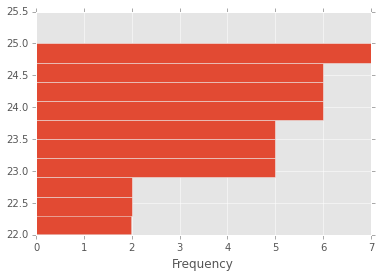

In [59]:
df.plot(kind="hist", orientation='horizontal', cumulative=True,legend=False)
df.describe()

In [49]:
#make it look like R
def Rstr(df): return df.shape, df.apply(lambda x: [x.unique()])

Rstr(df)

((7, 4), First Name     [[Bob, Alice, Malcolm, Felix, Alex, Tod, Derek]]
 Last Name     [[Smith, Williams, Jone, Brown, Cooper, Campbe...
 Country       [[United States, Canada, England, USA, Poland,...
 age                                          [[24, 23, 22, 25]]
 dtype: object)

It is a bit more crude then graphlab.

## Feature enginering

No suprises here, practically the same.

In [53]:
df.Country.apply(transform_country)
df['Full Name'] = df['First Name'] + ' ' + df['Last Name']
df

,First Name,Last Name,Country,age,Full Name
0,Bob,Smith,United States,24,Bob Smith
1,Alice,Williams,Canada,23,Alice Williams
2,Malcolm,Jone,England,22,Malcolm Jone
3,Felix,Brown,USA,23,Felix Brown
4,Alex,Cooper,Poland,23,Alex Cooper
5,Tod,Campbell,United States,22,Tod Campbell
6,Derek,Ward,Switzerland,25,Derek Ward
